In [1]:
import joblib
import datetime
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250


In [3]:
train_data.tail(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
54272,54272,Audi,A5 Sportback S line Premium Plus,2021,35000,Hybrid,261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...,8-Speed A/T,Black,Black,None reported,Yes,37499


In [4]:
train_data.shape

(54273, 13)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [6]:
train_data.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [7]:
train_data.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


In [8]:
train_data.drop(['id'], axis=1, inplace=True)

In [9]:
date_time = datetime.datetime.now()
train_data['vehicle_age']=date_time.year - train_data['model_year']
train_data.drop('model_year',axis=1,inplace=True)
train_data.head(2)

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,vehicle_age
0,Ford,F-150 Lariat,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,6
1,BMW,335 i,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,17


In [15]:
train_data.columns

Index(['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title', 'price',
       'vehicle_age'],
      dtype='object')

In [16]:
data_features = ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission',
                'ext_col', 'int_col', 'accident', 'clean_title', 'price', 'vehicle_age']

In [17]:
train_data = train_data[data_features]
categorical_features = [col for col in train_data.columns if train_data[col].dtype=='O']
numerical_features = [col for col in train_data.columns if train_data[col].dtype!='O']

In [18]:
for feature in categorical_features:
    print('{} has total {} unique features'.format(feature , train_data[feature].nunique()))

brand has total 53 unique features
model has total 1827 unique features
fuel_type has total 7 unique features
engine has total 1061 unique features
transmission has total 46 unique features
ext_col has total 260 unique features
int_col has total 124 unique features
accident has total 2 unique features
clean_title has total 1 unique features


In [19]:
# Loop through each categorical feature and apply mean encoding
for feature in categorical_features:
    mean_encoding = train_data.groupby(feature)['price'].mean()
    train_data[feature] = train_data[feature].map(mean_encoding)

train_data.head(2)

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,vehicle_age
0,38154.063227,43169.955645,74349,38940.499747,53064.682749,60508.125743,37614.687018,26723.437460,44233.044315,39218.443333,11000,6
1,40276.029448,15520.375546,80000,38940.499747,23719.608815,33931.317579,38413.911328,41290.661314,44233.044315,39218.443333,8250,17


In [ ]:
# Detect Outlier

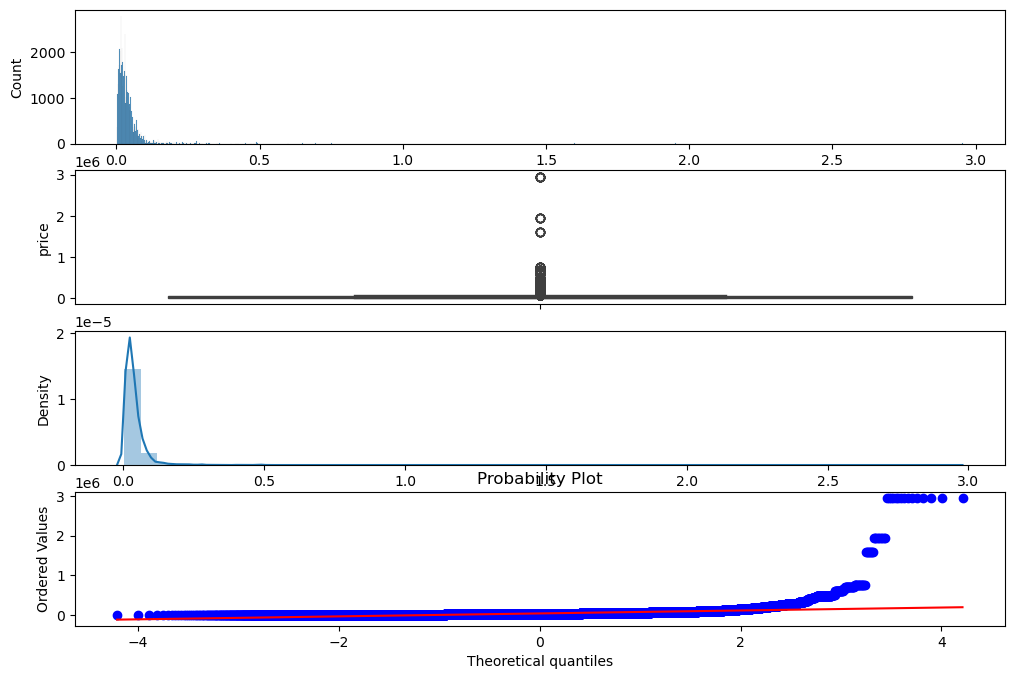

In [20]:
plt.figure(figsize=(12,8))

# First subplot
plt.subplot(411)
sns.histplot(train_data['price'])

# Second subplot
plt.subplot(412)
sns.boxplot(train_data['price'])

# Third subplot
plt.subplot(413)
sns.distplot(train_data['price'])

# Fourth subplot
plt.subplot(414)
stats.probplot(train_data['price'] , plot=plt)

plt.show()

In [ ]:
# Handle outlier in the target feature (price)

In [21]:
Q1 = train_data['price'].quantile(0.25)
Q3 = train_data['price'].quantile(0.75)
IQR = Q3 - Q1

In [22]:
# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [26]:
# Filter out the outliers
train_data = train_data[(train_data['price'] >= 
                                  lower_bound) & (train_data['price'] <= upper_bound)]

In [27]:
train_data.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,vehicle_age
0,38154.063227,43169.955645,74349,38940.499747,53064.682749,60508.125743,37614.687018,26723.437460,44233.044315,39218.443333,11000,6
1,40276.029448,15520.375546,80000,38940.499747,23719.608815,33931.317579,38413.911328,41290.661314,44233.044315,39218.443333,8250,17
2,34840.403933,14397.047619,91491,38940.499747,16442.580952,24939.541386,26112.148936,27862.756473,44233.044315,39218.443333,15000,15
3,40276.029448,68657.677778,2437,51727.819366,60728.788546,45993.777037,45155.865090,49465.203662,44233.044315,39218.443333,63500,2
4,17526.060403,10793.000000,111000,38940.499747,27903.848214,29971.027033,37774.187602,41290.661314,44233.044315,39218.443333,7850,23


In [ ]:
sns.boxplot(train_data['price'])

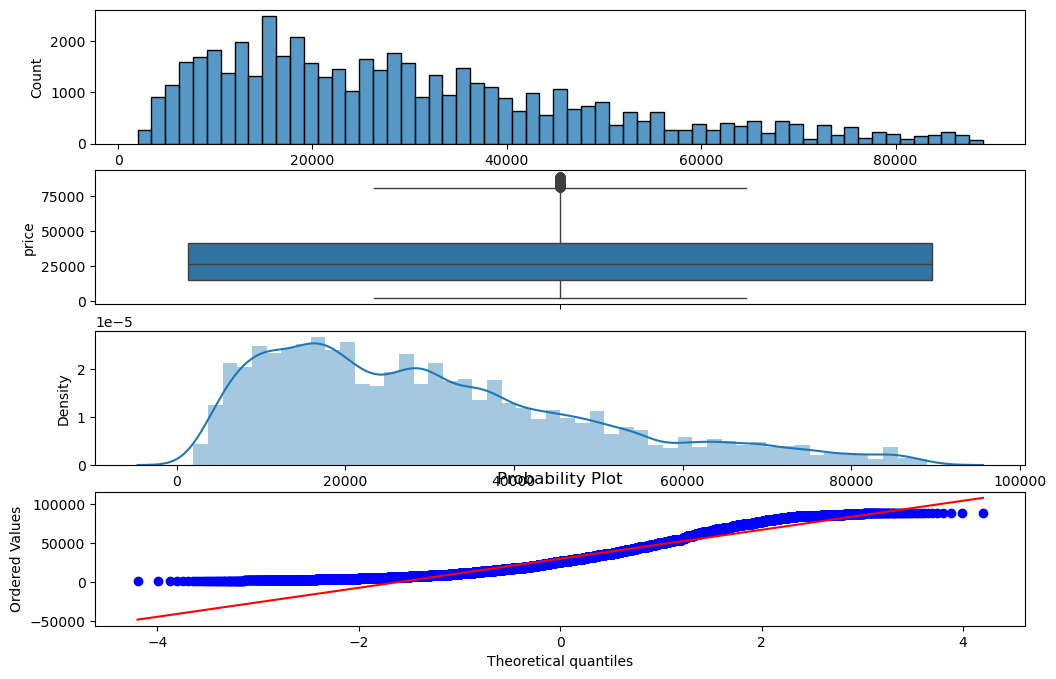

In [29]:
plt.figure(figsize=(12,8))

# First subplot
plt.subplot(411)
sns.histplot(train_data['price'])

# Second subplot
plt.subplot(412)
sns.boxplot(train_data['price'])

# Third subplot
plt.subplot(413)
sns.distplot(train_data['price'])

# Fourth subplot
plt.subplot(414)
stats.probplot(train_data['price'] , plot=plt)

plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Split data into features and target variable
X = train_data.drop('price', axis=1)
y = train_data['price']

In [32]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(40940, 11)

In [ ]:
# Model training

In [34]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
# Prediction on test data
y_pred1 = lr.predict(X_val)
y_pred2 = rf.predict(X_val)
y_pred3 = xgb.predict(X_val)
y_pred4 = xg.predict(X_val)

In [37]:
# Evaluate algorithm
score1 = metrics.r2_score(y_val,y_pred1)
score2 = metrics.r2_score(y_val,y_pred2)
score3 = metrics.r2_score(y_val,y_pred3)
score4 = metrics.r2_score(y_val,y_pred4)

In [38]:
print(score1,score2,score3,score4)

0.5924290344156935 0.6520224580673797 0.6587435224704119 0.6631901593122745


In [39]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             "R2_SCORE":[score1,score2,score3,score4]})

In [40]:
final_data

,Models,R2_SCORE
0,LR,0.592429
1,RF,0.652022
2,GBR,0.658744
3,XG,0.663190


In [ ]:
sns.barplot(final_data['Models'],final_data['R2_SCORE'])

In [ ]:
# Improve the performance of models

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
X = train_data.drop(columns=['price'])
y = train_data['price']

In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Standardize the features
scaler = StandardScaler()

In [47]:
# Models
models = {
    'LR': LinearRegression(),
    'RF': RandomForestRegressor(random_state=42),
    'GBR': GradientBoostingRegressor(random_state=42),
    'XG': XGBRegressor(random_state=42)
}

In [48]:
# Hyperparameters for tuning
param_grids = {
    'RF': {
        'RF__n_estimators': [100, 200],
        'RF__max_depth': [None, 10, 20],
        'RF__min_samples_split': [2, 5]
    },
    'GBR': {
        'GBR__n_estimators': [100, 200],
        'GBR__learning_rate': [0.1, 0.01],
        'GBR__max_depth': [3, 5]
    },
    'XG': {
        'XG__n_estimators': [100, 200],
        'XG__learning_rate': [0.1, 0.01],
        'XG__max_depth': [3, 5]
    }
}

In [49]:
# Function to train and evaluate models
def train_and_evaluate(models, param_grids, X_train, X_test, y_train, y_test):
    results = []

    for name, model in models.items():
        if name in param_grids:
            grid = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_root_mean_squared_error')
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
        else:
            best_model = model
            best_model.fit(X_train, y_train)

        y_pred = best_model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results.append((name, rmse, best_model))

    return results

In [50]:
# Applying Polynomial Features and Standard Scaling in a Pipeline
pipeline_steps = [('poly', poly), ('scaler', scaler)]

In [51]:
# Train and evaluate models without and with feature engineering
results = train_and_evaluate(models, param_grids, X_train, X_test, y_train, y_test)
for name, rmse, model in results:
    print(f'{name} RMSE: {rmse}')

print("With Polynomial Features:")

LR RMSE: 12219.819968538694
RF RMSE: 11093.932265284668
GBR RMSE: 11008.257171116056
XG RMSE: 11015.356016160395
With Polynomial Features:


In [69]:
test_data = pd.read_csv('test.csv')
test_data.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes


In [70]:
# Store IDs for submission
ids = test_data['id']

In [71]:
test_data.shape

(36183, 12)

In [72]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36183 non-null  int64 
 1   brand         36183 non-null  object
 2   model         36183 non-null  object
 3   model_year    36183 non-null  int64 
 4   milage        36183 non-null  int64 
 5   fuel_type     36183 non-null  object
 6   engine        36183 non-null  object
 7   transmission  36183 non-null  object
 8   ext_col       36183 non-null  object
 9   int_col       36183 non-null  object
 10  accident      36183 non-null  object
 11  clean_title   36183 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


In [73]:
test_data.drop(['id'], axis=1, inplace=True)

In [74]:
date_time = datetime.datetime.now()
test_data['vehicle_age']=date_time.year - test_data['model_year']
test_data.drop('model_year',axis=1,inplace=True)
test_data.head(2)

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,vehicle_age
0,Mercedes-Benz,E-Class E 350,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,10
1,Lexus,RX 350 Base,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,9


In [75]:
test_data.columns

Index(['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title', 'vehicle_age'],
      dtype='object')

In [76]:
data_features_test = ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission',
                'ext_col', 'int_col', 'accident', 'clean_title', 'vehicle_age']

In [77]:
test_data = test_data[data_features_test]
categorical_features = [col for col in test_data.columns if test_data[col].dtype=='O']
numerical_features = [col for col in test_data.columns if test_data[col].dtype!='O']

In [78]:
for feature in categorical_features:
    print('{} has total {} unique features'.format(feature , test_data[feature].nunique()))

brand has total 53 unique features
model has total 1791 unique features
fuel_type has total 7 unique features
engine has total 1038 unique features
transmission has total 44 unique features
ext_col has total 230 unique features
int_col has total 111 unique features
accident has total 2 unique features
clean_title has total 1 unique features


In [79]:
categorical_features

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [80]:
global_mean_encoding = train_data['price'].mean()

for feature in categorical_features:
    mean_encoding = train_data.groupby(feature)['price'].mean()
    test_data[feature] = test_data[feature].map(mean_encoding).fillna(global_mean_encoding)

test_data.head(2)

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,vehicle_age
0,30251.435634,30251.435634,73000,30251.435634,30251.435634,30251.435634,30251.435634,30251.435634,30251.435634,30251.435634,10
1,30251.435634,30251.435634,128032,30251.435634,30251.435634,30251.435634,30251.435634,30251.435634,30251.435634,30251.435634,9


In [81]:
X_train = train_data.drop(columns=['price'])
y_train = train_data['price']

In [82]:
X_test = test_data

In [83]:
# Train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [84]:
# Make predictions on the test dataset
test_predictions = gbr.predict(X_test)

In [85]:
test_predictions

array([20546.23117949, 18044.85010169, 26483.97152734, ...,
       13399.82846089, 32169.2604148 , 12862.38995061])

In [ ]:
ids = test_data['id']

In [90]:
submission_data = pd.DataFrame({'id': ids, 'price': test_predictions})

In [91]:
submission_data.head()

,id,price
0,54273,20546.231179
1,54274,18044.850102
2,54275,26483.971527
3,54276,31430.005425
4,54277,26977.006932


In [92]:
submission_data.to_csv('submission_file_2nd.csv', index=False)